
## Lecture 6

## Text Classification 


We will be using scikit-learn, a library for Machine Learning and predictive data analysis in Python. Scikit-learn is easy to learn and use. It has a wide variating of Algorithms that can support leading-edge research.
https://scikit-learn.org/stable/index.html

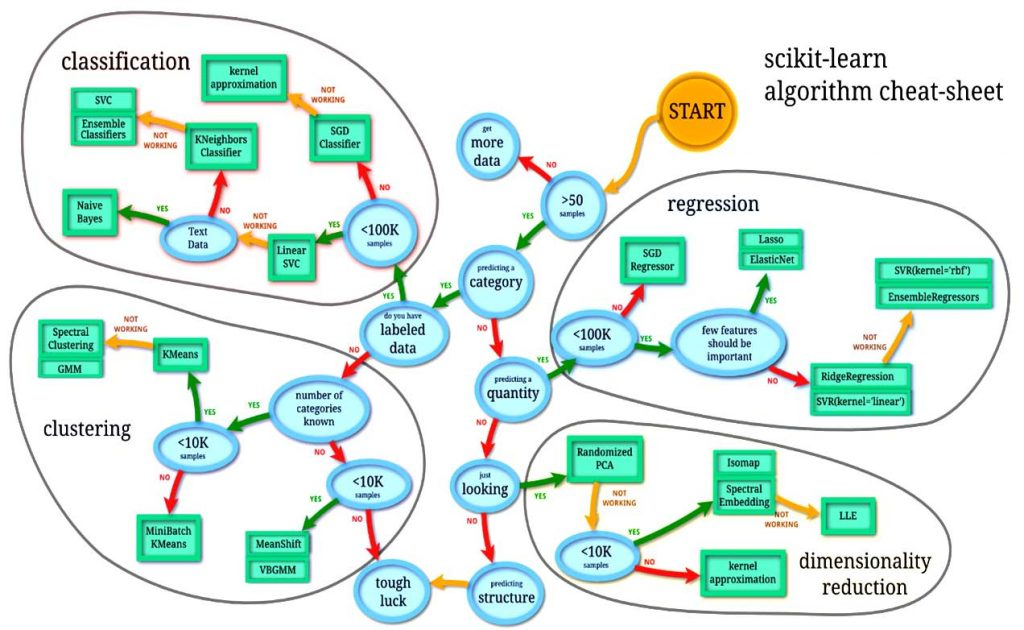

# Sentiment Classification
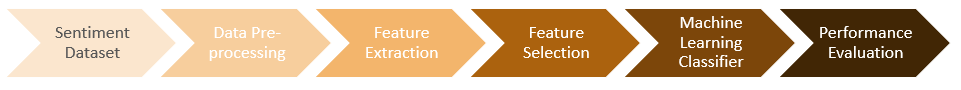
Sentiment classification is a text classification application. In this notebook we will develop a sentiment classification model that classifies some text document to either have positive or negative sentiment.
We are going to use the review corpus available at http://www.cs.cornell.edu/people/pabo/movie-review-data. The data has 2000 processed down-cased text files. The data has 2 labels, namely, 'pos' (50% of the files) and 'neg'(50% of the files).

Let's start by importing our libraries


In [2]:
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\raars\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Now we will view our data, 
The dataset has 2 main set of files under the txt_sentoken folder. One subfolder is called 'pos' and the other is called 'neg'. Each sub folders has 1000 files representing different movie reviews.
we can read our files using the open() and read() function available in Python. We can also use the load_files() function available in scikit as sklearn_dataset. Since we will be practicing using scikit library, we will use it to load our files 

In [6]:
movie_reviews= load_files("txt_sentoken/")
data, labels = movie_reviews.data, movie_reviews.target
print("****Sample Review****\n",data[0])
print("****Sample Label****\n",labels[0])

****Sample Review****
 b"arnold schwarzenegger has been an icon for action enthusiasts , since the late 80's , but lately his films have been very sloppy and the one-liners are getting worse . \nit's hard seeing arnold as mr . freeze in batman and robin , especially when he says tons of ice jokes , but hey he got 15 million , what's it matter to him ? \nonce again arnold has signed to do another expensive blockbuster , that can't compare with the likes of the terminator series , true lies and even eraser . \nin this so called dark thriller , the devil ( gabriel byrne ) has come upon earth , to impregnate a woman ( robin tunney ) which happens every 1000 years , and basically destroy the world , but apparently god has chosen one man , and that one man is jericho cane ( arnold himself ) . \nwith the help of a trusty sidekick ( kevin pollack ) , they will stop at nothing to let the devil take over the world ! \nparts of this are actually so absurd , that they would fit right in with dogma

As it can be seen in the data snippet, we need to get our data ready by preprocessing the text.
Basically, we will:
<br>-Remove punctuations (and single characters resulting from removing punctiuation)
<br>-Digits
<br>-Extra spaces
<br>-Lemmatize
<br>-Stopwords
<br>-Tokenize the data

In [9]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

all_reviews=[]

for i in range(len(data)):
    
    #Remove non-words using regular expressions
    review= re.sub(r'\W+',' ', str(data[i]))
    
    #Remove digits
    review = re.sub(r'\d+', ' ', review)
    
    #Remove single characters
    review = re.sub(r'\s+[a-zA-Z]\s+', ' ', review)
    
    #Remove single characters at the begining or end of sentences
    review = re.sub(r'^[a-zA-Z]\s+', ' ', review)
    review = re.sub(r'\s+[a-zA-Z]$', ' ', review)
    
    #Replace one or more spaces with one
    review= re.sub(r'\s+', ' ', review)

    #Remove stopwords as they are irrelevant to this task
    review = [word for word in review.split() if not word in stop_words]
    
    #Lemmatize, to capture semantically related words
    lemmatizer = WordNetLemmatizer()
    data_clean= [lemmatizer.lemmatize(word) for word in review]
    
    data_clean=' '.join(data_clean)

    all_reviews.append(data_clean)

print ("****Sample Clean Data*****",all_reviews[0])
    

****Sample Clean Data***** arnold schwarzenegger icon action enthusiast since late lately film sloppy one liner getting worse nit hard seeing arnold mr freeze batman robin especially say ton ice joke hey got million matter nonce arnold signed another expensive blockbuster compare like terminator series true lie even eraser nin called dark thriller devil gabriel byrne come upon earth impregnate woman robin tunney happens every year basically destroy world apparently god chosen one man one man jericho cane arnold nwith help trusty sidekick kevin pollack stop nothing let devil take world nparts actually absurd would fit right dogma nyes film weak better blockbuster right sleepy hollow make world enough look like star film nanyway definitely seem like arnold movie nit type film see nsure gave u chuckle well known one liner seemed confused character film going nit understandable especially ending changed according source naside form still walked much like past film ni sorry say arnold maybe

# Feature Extraction
<br>
Now we need to extract the features we are going to base our classification upon. 
Some lexicon based methods include:
<br>-Bag of Words
<br>-Term Frequency-Inverse Document Frequency (TF-IDF)
<br> In this context we will use BOW as features. We will count our words using CountVectorizer available in sklearn.feature_extraction.text
<br>CountVectorizer converts a collection of text documents to a matrix of token counts.
<br>You can read a very recent paper about feature selection for Sentiment Analysis here, https://arxiv.org/pdf/1911.00288.pdf

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()
bow= cv.fit_transform(all_reviews).toarray()
print(bow)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Now we need to save some of the data for testing (and development in some cases) for later evaluation. We can use train_test_split function available in sckit-learn available in sklearn.model_selection. Since our data is not so large, we will save 10% of the data for testing and 90% for training.

In [12]:
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(bow, labels, test_size=0.1)


In [13]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(data_train, label_train)

In [14]:
label_pred = model.predict(data_test)


# Model Evaluation

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(label_test,label_pred))
print(classification_report(label_test,label_pred))
print(accuracy_score(label_test, label_pred))

[[80 12]
 [23 85]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.82        92
           1       0.88      0.79      0.83       108

    accuracy                           0.82       200
   macro avg       0.83      0.83      0.82       200
weighted avg       0.83      0.82      0.83       200

0.825


Confusion Matrix


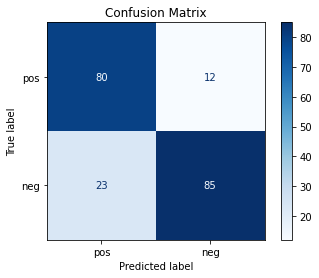

In [17]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt


class_names = ['pos','neg']
title= "Confusion Matrix"
disp = plot_confusion_matrix(model, data_test, label_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
disp.ax_.set_title(title)

print(title)
#print(disp.confusion_matrix)

plt.show()
